In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1- Load tsv File into pandas Dataframe

In [3]:
GithubCom = pd.read_csv('github_comments.tsv', sep='\t')

In [4]:
GithubCom.drop("Unnamed: 0",axis = 1,inplace=True)

In [5]:
GithubCom.head()

,comment,comment_date,is_merged,merged_at,request_changes
0,@chef/maintainers,2017-05-29 10:54:23,0.0,NaN,0
1,omnibus builds are already in pain so merging ...,2017-05-25 20:34:45,1.0,2017-05-25 20:34:27,0
2,@chef/client-core reviewage (lets not think to...,2017-05-25 17:21:56,1.0,2017-05-25 19:05:10,0
3,This blows up 14.04 because allow-downgrades i...,2017-05-25 19:15:14,0.0,NaN,1
4,I know @lamont-granquist and @thommay are goi...,2017-05-23 22:58:13,1.0,2017-05-24 04:40:42,0


In [6]:
len(GithubCom)

4001

## 2- General Description over the DataSet
- We have 3606 Unique ** Comments ** from 4001
- 3991 Unique ** Comments Dates ** from 4001
- We have only 1159 ** merged_at Date ** the rest is NaN So we have 1159 pull request Not merged 
- For the two variables ** is_merged ** and ** request_changes ** we have all the observation 

In [7]:
GithubCom.describe(include='all')

,comment,comment_date,is_merged,merged_at,request_changes
count,4001,4001,4001.000000,1159,4001.000000
unique,3606,3991,NaN,248,NaN
top,"Jenkins, retest this please",2016-08-09 06:25:32,NaN,2016-12-21 15:38:01,NaN
freq,49,2,NaN,68,NaN
mean,NaN,NaN,0.289678,NaN,0.304924
std,NaN,NaN,0.453669,NaN,0.460433
min,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,0.000000,NaN,0.000000
50%,NaN,NaN,0.000000,NaN,0.000000
75%,NaN,NaN,1.000000,NaN,1.000000


## 3 - Variables Type processing
- We need to check the types of the variables to use them in further analysis and generate new features from them if possible
- We can't use ** comment_date ** and ** merged_at ** as the object we need to change them to datetime
- ** is_merged ** since it's binary we can change it to end

In [8]:
GithubCom.dtypes

comment             object
comment_date        object
is_merged          float64
merged_at           object
request_changes      int64
dtype: object

In [9]:
GithubCom['is_merged'] = GithubCom['is_merged'].astype('int64')
## it's the format of our Date object '%Y-%m-%d %H:%M:%S'
GithubCom['comment_date'] =  pd.to_datetime(GithubCom['comment_date'], format='%Y-%m-%d %H:%M:%S')
GithubCom['merged_at'] =  pd.to_datetime(GithubCom['merged_at'], format='%Y-%m-%d %H:%M:%S')

In [10]:
GithubCom.dtypes

comment                    object
comment_date       datetime64[ns]
is_merged                   int64
merged_at          datetime64[ns]
request_changes             int64
dtype: object

In [11]:
GithubCom.iloc[16].comment

'Unfortunately, it would be totally valid that two cookbooks want to install the same gem with the same options (e.g. install from the same git repo), but currently it would produce an invalid Gemfile in that case. \r\n\r\nEDIT: Ah, nvm you mean replacing the warning with a fatal error. Yes that makes sense.'

#### After Changing Dates to Datetime we can do all sort of things 
- Select specific Interval Of comments
- Select specific Day,Month,Year or hour

In [12]:
## 2016 Comment only
GithubCom[GithubCom['comment_date'].dt.year == 2016].head(3)

,comment,comment_date,is_merged,merged_at,request_changes
133,@lovachittumuri Please sign the [Contributor L...,2016-12-20 22:09:49,0,NaT,0
134,@lovachittumuri Thank you for signing the [Con...,2016-12-20 22:13:19,0,NaT,0
136,Nice! Thanks for the PR,2016-12-29 14:56:59,0,NaT,0


In [13]:
## 2015 Comment only
GithubCom[GithubCom['comment_date'].dt.year == 2015].head(3)

,comment,comment_date,is_merged,merged_at,request_changes
230,Sorry that you found this confusing. The need ...,2015-12-17 22:32:49,0,NaT,1
231,Thank you for your comment.\nI found I had mis...,2015-12-18 08:52:46,0,NaT,0
232,"Having thought about this some more, I think i...",2015-12-18 10:36:53,0,NaT,1


In [14]:
## at 5 pm Comment only
GithubCom[GithubCom['comment_date'].dt.hour == 17].head(3)

,comment,comment_date,is_merged,merged_at,request_changes
2,@chef/client-core reviewage (lets not think to...,2017-05-25 17:21:56,1,2017-05-25 19:05:10,0
32,I'm not sure the targeted for chef 15 deprecat...,2017-05-12 17:15:40,0,NaT,1
53,@jd1 Please sign the [Contributor License Agre...,2017-04-25 17:18:56,0,NaT,0


## 4 - features engineering 
- Since we have our variables changed to Datetime we can create a variable Called ** Duration ** which repsents the diffrence between ** comment_date **  and  ** merged_at **

In [15]:
GithubCom.head()

,comment,comment_date,is_merged,merged_at,request_changes
0,@chef/maintainers,2017-05-29 10:54:23,0,NaT,0
1,omnibus builds are already in pain so merging ...,2017-05-25 20:34:45,1,2017-05-25 20:34:27,0
2,@chef/client-core reviewage (lets not think to...,2017-05-25 17:21:56,1,2017-05-25 19:05:10,0
3,This blows up 14.04 because allow-downgrades i...,2017-05-25 19:15:14,0,NaT,1
4,I know @lamont-granquist and @thommay are goi...,2017-05-23 22:58:13,1,2017-05-24 04:40:42,0


In [16]:
GithubCom['Duration'] = GithubCom['merged_at'] - GithubCom['comment_date']

In [17]:
GithubCom.head()

,comment,comment_date,is_merged,merged_at,request_changes,Duration
0,@chef/maintainers,2017-05-29 10:54:23,0,NaT,0,NaT
1,omnibus builds are already in pain so merging ...,2017-05-25 20:34:45,1,2017-05-25 20:34:27,0,-1 days +23:59:42
2,@chef/client-core reviewage (lets not think to...,2017-05-25 17:21:56,1,2017-05-25 19:05:10,0,01:43:14
3,This blows up 14.04 because allow-downgrades i...,2017-05-25 19:15:14,0,NaT,1,NaT
4,I know @lamont-granquist and @thommay are goi...,2017-05-23 22:58:13,1,2017-05-24 04:40:42,0,05:42:29


### Duration is of type timedelta64 So if the merged_at Date is before the comment _date we will get something negative
- like this example ** comment_date: 2017-05-25 20:34:45 ** ** merged_at: 2017-05-25 20:34:27 ** ** duration: -1 days +23:59:42 **, here we have a 18 second delay from merged_at to comment_date so it's minus 1 day plus 23 hours, 59 minutes, 42 seconds
- For positive results we only get for example 7 days 09:23:34
- hopefully we have in numpy a timedelta converter that we can use to transform our interval from timedelta to seconds

In [18]:
GithubCom.dtypes

comment                     object
comment_date        datetime64[ns]
is_merged                    int64
merged_at           datetime64[ns]
request_changes              int64
Duration           timedelta64[ns]
dtype: object

### Timedelta for the first Five examples

In [19]:
GithubCom[:5]['Duration'] / np.timedelta64(1, 's')

0        NaN
1      -18.0
2     6194.0
3        NaN
4    20549.0
Name: Duration, dtype: float64

In [20]:
GithubCom['Duration'] = GithubCom['Duration'] / np.timedelta64(1, 's')

In [21]:
GithubCom.head()

,comment,comment_date,is_merged,merged_at,request_changes,Duration
0,@chef/maintainers,2017-05-29 10:54:23,0,NaT,0,NaN
1,omnibus builds are already in pain so merging ...,2017-05-25 20:34:45,1,2017-05-25 20:34:27,0,-18.0
2,@chef/client-core reviewage (lets not think to...,2017-05-25 17:21:56,1,2017-05-25 19:05:10,0,6194.0
3,This blows up 14.04 because allow-downgrades i...,2017-05-25 19:15:14,0,NaT,1,NaN
4,I know @lamont-granquist and @thommay are goi...,2017-05-23 22:58:13,1,2017-05-24 04:40:42,0,20549.0


In [22]:
## Check if the variable is_merged equals 1 normaly merge_at needs to be defined

In [23]:
GithubCom['merged_at'][GithubCom['is_merged'] == 1].isnull().sum()

0

In [24]:
GithubCom.dtypes

comment                    object
comment_date       datetime64[ns]
is_merged                   int64
merged_at          datetime64[ns]
request_changes             int64
Duration                  float64
dtype: object

0    2842
1    1159
Name: is_merged, dtype: int64


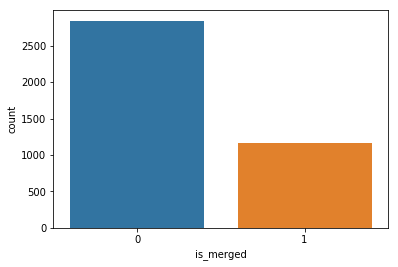

In [25]:
## some countPlot to See
print(GithubCom.is_merged.value_counts())
sns.countplot(data=GithubCom,x='is_merged')

0    2781
1    1220
Name: request_changes, dtype: int64


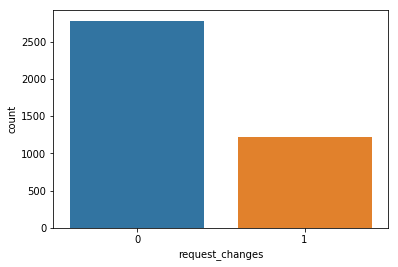

In [26]:
## some countPlot to See
print(GithubCom.request_changes.value_counts())
sns.countplot(data=GithubCom,x='request_changes')

### Average Duration for merging pull request with request_changes and without
- From the average Duration we see that Without a request change the is_merged date is around the average of 1.8 days, unlike when a request_changes is requested the average duration to merge the pull request is up to 3 days
- To give a clearer perspective about request_changes we need to create variable from ** comment_date** such as ** year **, ** month **, ** Day of Week ** and ** quarter **

In [29]:
print("Avg Number of Days for merging Pull request after request_changes  ",GithubCom['Duration'][GithubCom['request_changes'] == 1].mean()/86400)
print("Avg Number of Days for merging Pull request  Without request_changes ",GithubCom['Duration'][GithubCom['request_changes'] == 0].mean()/86400)

Avg Number of Days for merging Pull request after request_changes   3.08505187956
Avg Number of Days for merging Pull request  Without request_changes  1.8261971164


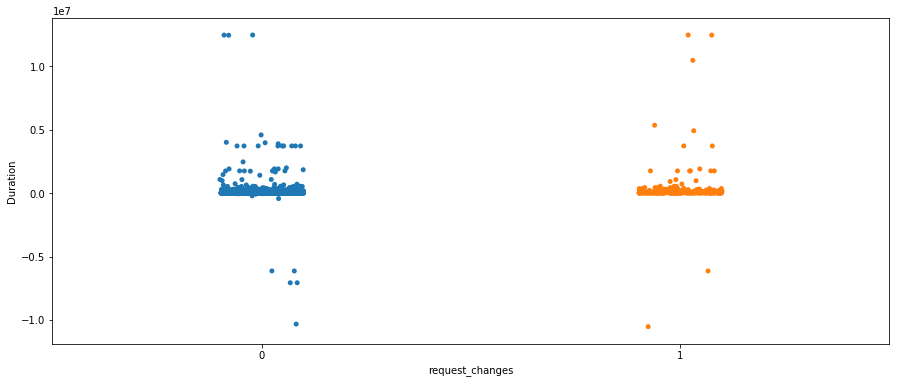

In [25]:
ax = plt.figure(figsize=(15,6))
sns.stripplot(data=GithubCom,y='Duration',x='request_changes', jitter=True)

In [52]:
GithubCom['year'] = GithubCom.comment_date.dt.year
GithubCom['month'] = GithubCom.comment_date.dt.month
GithubCom['day_week'] = GithubCom.comment_date.dt.dayofweek
GithubCom['quarter'] = GithubCom.comment_date.dt.quarter

In [53]:
GithubCom.head()

,comment,comment_date,is_merged,merged_at,request_changes,Duration,year,month,day_week,quarter
0,@chef/maintainers,2017-05-29 10:54:23,0,NaT,0,NaN,2017,5,0,2
1,omnibus builds are already in pain so merging ...,2017-05-25 20:34:45,1,2017-05-25 20:34:27,0,-18.0,2017,5,3,2
2,@chef/client-core reviewage (lets not think to...,2017-05-25 17:21:56,1,2017-05-25 19:05:10,0,6194.0,2017,5,3,2
3,This blows up 14.04 because allow-downgrades i...,2017-05-25 19:15:14,0,NaT,1,NaN,2017,5,3,2
4,I know @lamont-granquist and @thommay are goi...,2017-05-23 22:58:13,1,2017-05-24 04:40:42,0,20549.0,2017,5,1,2


#### merge Duration With a year and request_changes
- 2016 and 2017 have the most observations and 2016 is the year with the most delay in merging pull request

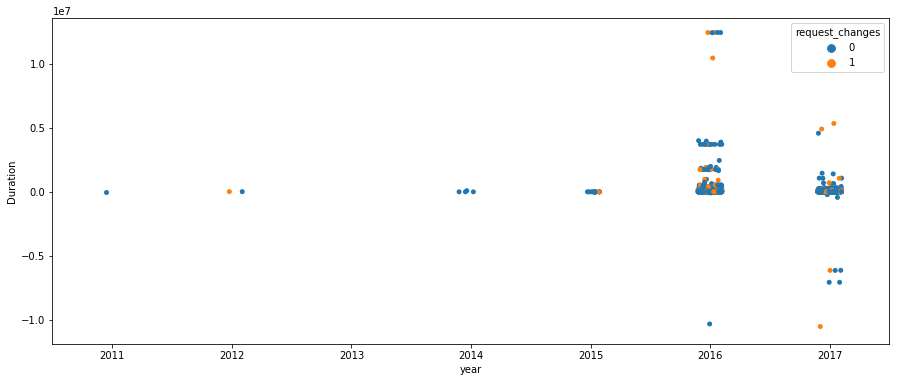

In [55]:
ax = plt.figure(figsize=(15,6))
sns.stripplot(data=GithubCom,y='Duration',x='year',hue="request_changes", jitter=True)

#### merge Duration With quarter and request_changes
- the second quarter is the quarter of the year with the most delay in time of merging

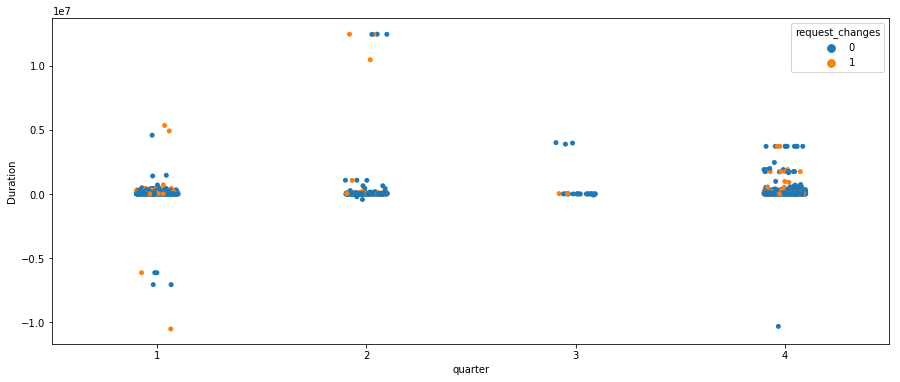

In [56]:
ax = plt.figure(figsize=(15,6))
sns.stripplot(data=GithubCom,y='Duration',x='quarter',hue="request_changes", jitter=True)

#### merge Duration With day of the week and request_changes
- Monday is the day with most delay, if the comment was published Monday probably it will have more trouble to be accepted quickly

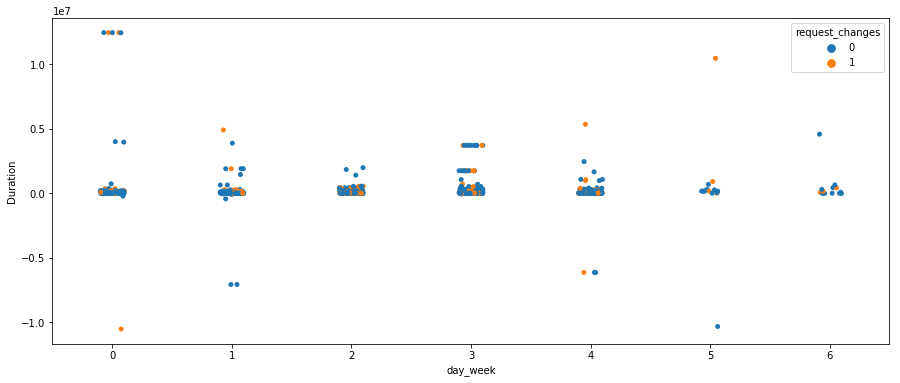

In [57]:
ax = plt.figure(figsize=(15,6))
sns.stripplot(data=GithubCom,y='Duration',x='day_week',hue="request_changes", jitter=True)

#### merge Duration With a month and request_changes
- April, November are the months with most delay 

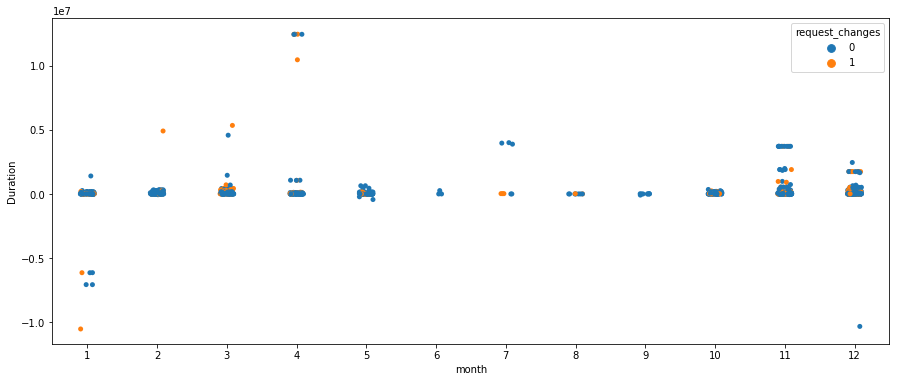

In [58]:
ax = plt.figure(figsize=(15,6))
sns.stripplot(data=GithubCom,y='Duration',x='month',hue="request_changes", jitter=True)

### To get a Better idea point plot is the best way to plot quantitative to qualitative variables
-  Duration BY Year

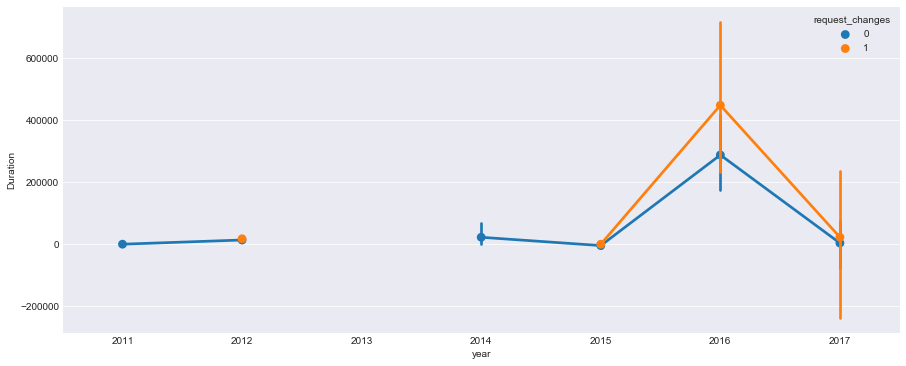

In [78]:
ax = plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
ax = sns.pointplot(x="year", y="Duration",hue='request_changes', data=GithubCom)

- Duration By Month

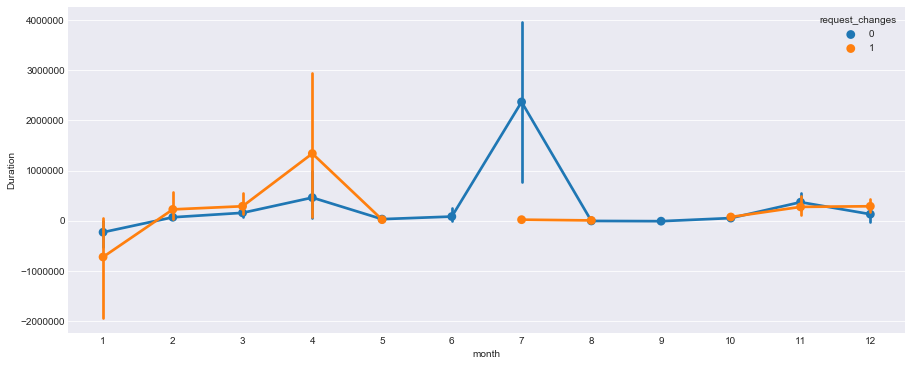

In [77]:
ax = plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
ax = sns.pointplot(x="month", y="Duration",hue='request_changes', data=GithubCom)

- Duration By day of week

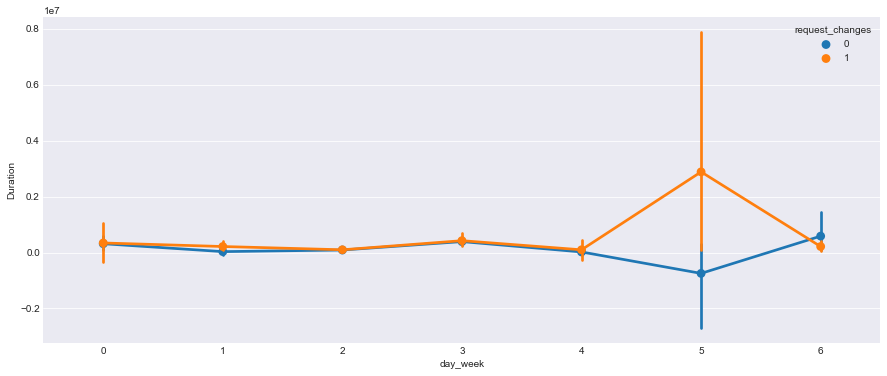

In [76]:
ax = plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
ax = sns.pointplot(x="day_week", y="Duration",hue='request_changes', data=GithubCom)

- Duration by quarter

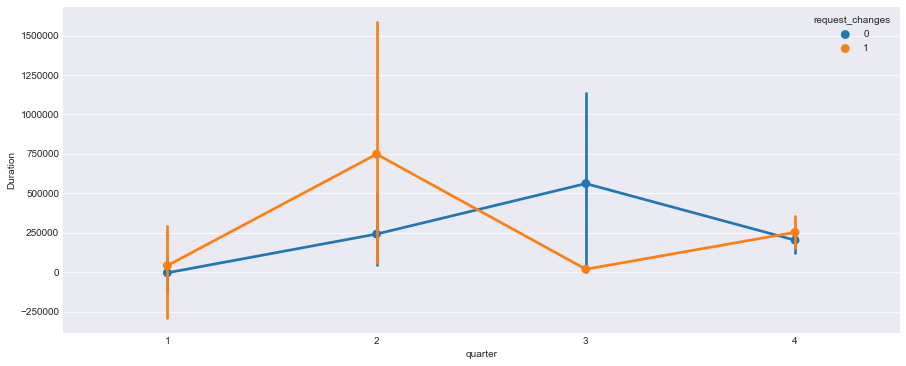

In [75]:
ax = plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
ax = sns.pointplot(x="quarter", y="Duration",hue='request_changes', data=GithubCom)

### Let's Add the hour of  comments and see the results


In [79]:
GithubCom['hour'] = GithubCom.comment_date.dt.hour

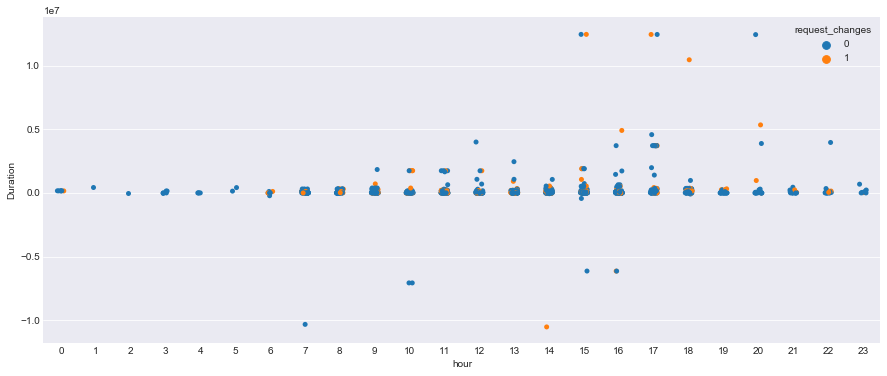

In [80]:
ax = plt.figure(figsize=(15,6))
sns.stripplot(data=GithubCom,y='Duration',x='hour',hue="request_changes", jitter=True)

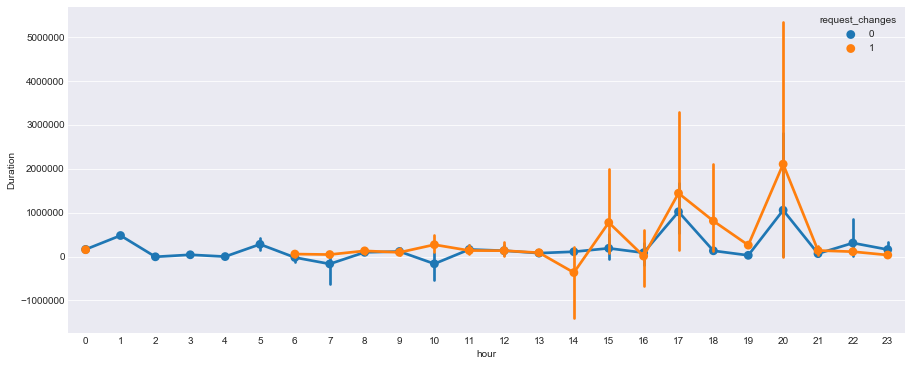

In [81]:
ax = plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
ax = sns.pointplot(x="hour", y="Duration",hue='request_changes', data=GithubCom)

### request change comments
- We see that if we take by ** year ** 2016 was the year were the number of requests for code change was published and where the duration of the merging is higher
- by ** month ** April is the month were comments with request of code change took more time than the ones without
- Same if we take by ** day ** we have a very clear pic in duration when the comment had a request for code change  on ** Saturday ** we explain that with the fact that developers tend to let the work unfinished to the next week after the weekend
- If We go smaller we see the plot for the hours  and the duration for merging, we see that  3,5,6,7,8 pm represents the hours were the comments with request of change take longer to solve 

## 5 - Text mining
#### NLTK natural language Tool Kit
- NLTK is a leading platform for building Python programs to work with human language data(NLP)
- with ** word_tokenize ** we can extract the words from the text
- with ** sent_tokenize ** we can extract the sentences from the text

#### Tokenization is the process of dividing the corpus into words or sentences for further processing
-  In this Case we can work with RegExpTokenizer that handle the ponctuation and special characters

In [34]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer


#nltk.download()
#nltk.download('punkt')
def tokenize_words_Sents(Sent):
    return word_tokenize(Sent),sent_tokenize(Sent)
def tokenize_words(Sent):
    return word_tokenize(Sent)   
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

Words,Sents = tokenize_words_Sents(GithubCom['comment'][1])
print("Words : ",Words)
print("Sents :",Sents)
print("Regular Expressions :",RegExpTokenizer(GithubCom['comment'][1]))

Words :  ['omnibus', 'builds', 'are', 'already', 'in', 'pain', 'so', 'merging', 'to', 'fix', 'those']
Sents : ['omnibus builds are already in pain so merging to fix those']
Regular Expressions : ['omnibus', 'builds', 'are', 'already', 'in', 'pain', 'so', 'merging', 'to', 'fix', 'those']


In [33]:
Words,Sents = tokenize_words_Sents(GithubCom['comment'][0])
print("Words : ",Words)
print("Sents :",Sents)
print("Regular Expressions :",RegExpTokenizer(GithubCom['comment'][0]))

Words :  ['@', 'chef/maintainers']
Sents : ['@chef/maintainers']
Regular Expressions : ['chef', 'maintainers']


#### Stop Words : usless words that we need to eliminate
-  NLTk offers English most popular StopWords with ** stop_Words **

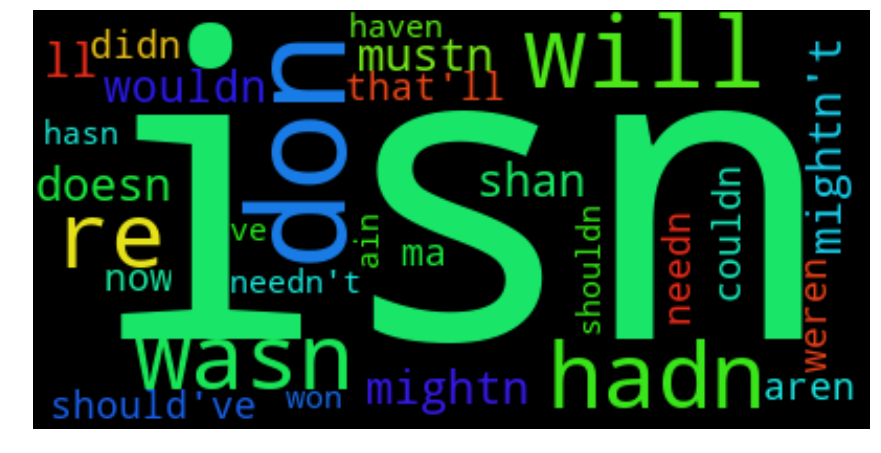

In [36]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
stop_words = set(stopwords.words("english"))
# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(stop_words))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
def Eliminate_Stop_Words(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return stop_words,filtered_words

def Eliminate_Stop_Word(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

stop_words,filtered_words = Eliminate_Stop_Words(Words)
print(stop_words)
print("------------------Words ------------------------")
print(Words)
print("------------------Words filltred---------------------")
print(filtered_words)

{'was', 's', "mightn't", 'through', "hasn't", 'then', 'ourselves', 'whom', 'so', 'now', 'yourselves', 'who', 'few', 'yourself', "you've", 'it', 'have', 'y', 'mustn', 'that', 'shan', 'yours', 'weren', "you'll", 'aren', 'under', 'more', 'but', 'its', 'during', "needn't", 'if', 'at', 'above', 'each', 'o', 'an', 'had', "haven't", 'm', 'will', "doesn't", 'hadn', "you're", "wasn't", 'while', 'me', 'll', 'him', 'wouldn', 'with', 'you', 'to', 'no', 'any', 'nor', 'themselves', 'or', 'here', 'didn', 'because', 'them', 'again', 'his', 'until', 'theirs', 'of', 'by', 'below', 'just', "won't", 'doing', 'most', 'same', 'itself', 'against', 'your', 'won', 'when', 'what', 'further', 'how', 'over', "she's", 're', 'once', 'having', 'such', 'he', 'those', 'off', 'where', 'both', "it's", "that'll", "wouldn't", 'is', 'and', 'ours', 'there', 'should', 'hers', 'from', 'into', 'these', 'did', 'only', 'own', 'be', 'a', 'been', 'ma', 'before', 'all', 'not', 'herself', 't', 'on', 'her', 'needn', 'd', 'myself', "i

#### Stemming 
- we try to eliminate all charcters at the end of each word 'ing' 'ed' 'er' 
- example :
- python
- pythoning
- pythoner
- ext ..
- so with the stemming we gain in computation

In [40]:
from nltk.stem import PorterStemmer
def Stemming_Words(Words):
    Ps = PorterStemmer()
    Stemmed_Words = []
    for m in Words:
        Stemmed_Words.append(Ps.stem(m))
    return Stemmed_Words
Stemmed_Words = Stemming_Words(filtered_words)
print("------------------Words ------------------------")
print(filtered_words)
print("------------------Words after Stemming---------------------")
print(Stemmed_Words)

------------------Words ------------------------
['omnibus', 'builds', 'already', 'pain', 'merging', 'fix']
------------------Words after Stemming---------------------
['omnibu', 'build', 'alreadi', 'pain', 'merg', 'fix']


#### Lemmatizing a variation  of Stemming
- instead of returning the same words with the last charcteres removed it returns the root of the word or another word synonymous so the returns are true English words

In [41]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
def Lemmatizing_Words(Words):
    Lm = WordNetLemmatizer()
    Lemmatized_Words = []
    for m in Words:
        Lemmatized_Words.append(Lm.lemmatize(m))
    return Lemmatized_Words

Lemmatized_Words = Lemmatizing_Words(filtered_words)
print("------------------Words ------------------------")
print(filtered_words)
print("------------------Words after Stemming---------------------")
print(Lemmatized_Words)

------------------Words ------------------------
['omnibus', 'builds', 'already', 'pain', 'merging', 'fix']
------------------Words after Stemming---------------------
['omnibus', 'build', 'already', 'pain', 'merging', 'fix']


### After the preparation of the processing functions we will try to see first what words our comments contain
- We merge our comments into a list of comments and we pass them into our processing pipline
- 1 - RegExpTokenizer
- 2 - Eliminate_Stop_Word
- 3 - Lemmatizing_Words

In [72]:
Texts = list(GithubCom['comment'])

In [200]:
#GEt words from Review_text m3neha Tokenize 
#RegExpTokenizer to get rid of ponctuation
ListWords =  [RegExpTokenizer(str(m)) for m in Texts]
print(ListWords[1])
#Eliminate Stop_Words
ListWords =  [Eliminate_Stop_Word(m) for m in ListWords]
print(ListWords[1])
#Lemmatizing
ListWords = [Lemmatizing_Words(m) for m in ListWords]
print(ListWords[1])

['omnibus', 'builds', 'are', 'already', 'in', 'pain', 'so', 'merging', 'to', 'fix', 'those']
['omnibus', 'builds', 'already', 'pain', 'merging', 'fix']
['omnibus', 'build', 'already', 'pain', 'merging', 'fix']


In [201]:
print(ListWords[:2])

[['chef', 'maintainer'], ['omnibus', 'build', 'already', 'pain', 'merging', 'fix']]


In [202]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(str(w.lower()))
    all_words = FreqDist(all_words)
    #print(all_words.most_common(300))
    #print(len(all_words.keys()))
    return all_words

In [203]:
all_words = Bag_Of_Words(ListWords)

In [204]:
## We have a total 7182 Words in our corpus after cleaning stop words and irrelvent Words ,or words with length < 1

In [205]:
len(all_words)

7416

### This Word count shows that the most redundant words are about diffrents topic of programming and developers 
- thanks first with over 800 times
- spring second for java developers
- test
- hibernate also for java developers
- http
- java
- merged
- change 
- etc ..

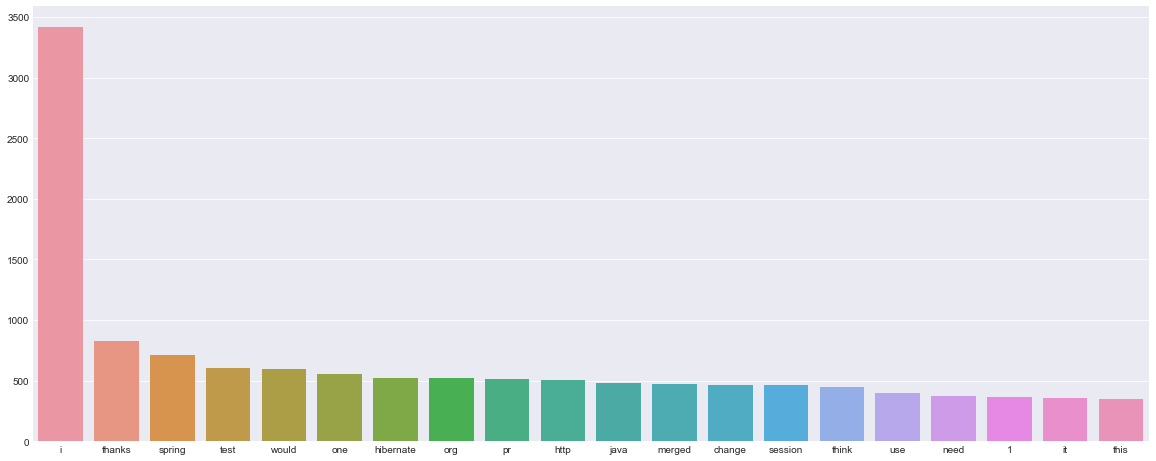

In [206]:
import seaborn as sns
fig = plt.figure(figsize=(20,8))
count = []
Words  = []
for w in all_words.most_common(20):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

### Word Cloud
- Even with this word Cloud and the count plot we can see that there's some redundent words that generaly talk about different topics for example spring,hibernate,java,jdk we maybe looking at java developers comments ,but the problem here is that there's hidden topical patterns that are present across the collection we can't see for now but hopefully after using the needed model we can assign each comment to it's topic
 

Combien de Mots !!! 7416


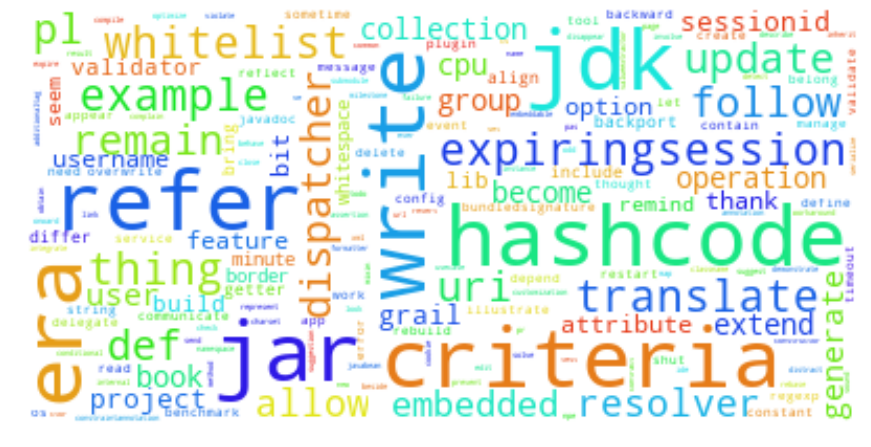

In [207]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words))

#### eliminate irrelevent Words : this function eliminates words with length less than 2 and  words like 'thanks','would','think','need','see','like' because they are so much redundent but doesn't help use in our topic modeling for the next step to et the most efficient topics from the comments

In [208]:

def eliminate_irrelevent_Words(ListWords):
    ListWords1 = [] 
    for m in ListWords:
        l = [item.lower() for item in m]
        ListWords1.append(l)
    ListWords = ListWords1
    #print(ListWords)
    #elimnate words

    ListWords2 = []
    for m in ListWords:
        result =[]
        for w in m:
            if len(w) > 2 and  w not in ['this','thanks','would','think','need','see','like','use','could','the','also','sure']:
                result.append(w)
        ListWords2.append(result)

    return ListWords2

In [209]:
ListWords = eliminate_irrelevent_Words(ListWords)
ListWords[100]

['final', 'initialisation', 'happening', 'constructor']

In [210]:
all_words = Bag_Of_Words(ListWords)

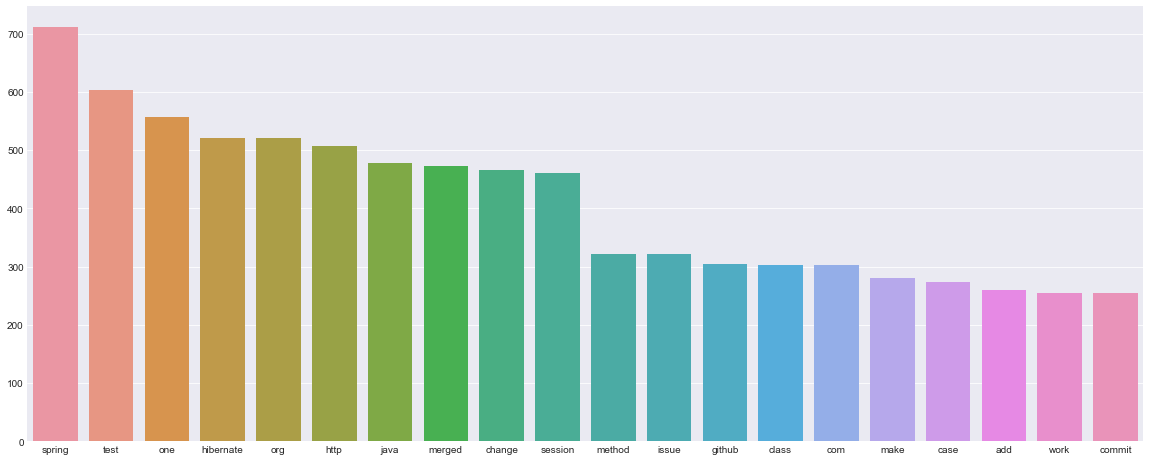

In [211]:
import seaborn as sns
fig = plt.figure(figsize=(20,8))
count = []
Words  = []
for w in all_words.most_common(20):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

In [212]:
Document = []
for sent in ListWords:
    Document.append(" ".join(sent))

### Latent Dirichlet Allocation (LDA)
-  LDA is a tchnique used in topic modeling 
-  In the LDA model, each document is viewed as a mixture of topics that are present in the corpus. The model proposes that each word in the document is attributable to one of the document’s topics.
-  LDA is an iterative algorithm. Here are the two main steps:

    In the initialization stage, each word is assigned to a random topic.
    Iteratively, the algorithm goes through each word and reassigns the word to a topic taking into consideration:
    - What’s the probability of the word belonging to a topic
    - What’s the probability of the document to be generated by a topic

- Image:
![](lda.jpg)

In [213]:
Document[:5]

['chef maintainer',
 'omnibus build already pain merging fix',
 'chef client core reviewage let hard breakpoint resource picked shortest bit provider code',
 'blow allow downgrade supported figure first version ubuntu debian safely support conditionally add flag',
 'know lamont granquist thommay going unhappy one absolutely short term fix get choco window jenkins node system failure']

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


no_features = 1500

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(Document)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 3

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
print("---------------lda------------------")
display_topics(lda, tf_feature_names, no_top_words)


D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


---------------lda------------------
Topic 0:
spring http github com commit project test session issue pull
Topic 1:
method change case class make maybe type value test way
Topic 2:
merged org hibernate java test master search springframework bean gsmet


### LDA results are intresting we can see some topics
- Topic 0: spring http github com commit project test session issue pull
- Topic 1: method change case class make maybe type value test way
- Topic 2: merged org hibernate java test master search springframework bean gsmet

In [215]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
1      49.669209        1       1 -372.142456 -195.243271
0      29.377677        1       2 -437.769562 -443.703552
2      20.953115        1       3 -620.127258 -262.638367, topic_info=     Category        Freq                        Term       Total  loglift  \
term                                                                         
817   Default  468.000000                      merged  468.000000  30.0000   
908   Default  462.000000                         org  462.000000  29.0000   
1265  Default  574.000000                      spring  574.000000  28.0000   
686   Default  429.000000                        java  429.000000  27.0000   
577   Default  564.000000                   hibernate  564.000000  26.0000   
591   Default  499.000000                        http  499.000000  25.0000   
534   Default  298.000000                      github  298.000000  24.0000   
1266  Default  189.000000             springframework  189.000000  23.0000   
119   Default  190.000000                        bean  190.000000  22.0000   
211   Default  293.000000                         com  293.000000  21.0000   
1177  Default  227.000000                      search  227.000000  20.0000   
797   Default  224.000000                      master  224.000000  19.0000   
1011  Default  213.000000                     project  213.000000  18.0000   
219   Default  278.000000                      commit  278.000000  17.0000   
1443  Default  152.000000                     version  152.000000  16.0000   
552   Default  200.000000                       gsmet  200.000000  15.0000   
1031  Default  170.000000                        pull  170.000000  14.0000   
488   Default  158.000000                       fixed  158.000000  13.0000   
457   Default  126.000000                     factory  126.000000  12.0000   
1344  Default  585.000000                        test  585.000000  11.0000   
217   Default  182.000000                     comment  182.000000  10.0000   
1063  Default  114.000000                     rebased  114.000000   9.0000   
1313  Default  173.000000                     support  173.000000   8.0000   
166   Default  291.000000                        case  291.000000   7.0000   
362   Default  140.000000                         doc  140.000000   6.0000   
694   Default  112.000000                     jenkins  112.000000   5.0000   
1437  Default  100.000000                   validator  100.000000   4.0000   
189   Default  107.000000                         cla  107.000000   3.0000   
411   Default  122.000000                       error  122.000000   2.0000   
151   Default  141.000000                       build  141.000000   1.0000   
...       ...         ...                         ...         ...      ...   
850    Topic3   18.483826     multivaluedfacetingtest   19.226399   1.5235   
321    Topic3   17.511725  defaultlistablebeanfactory   18.217125   1.5234   
1399   Topic3   16.624578                       u043d   17.316737   1.5221   
1063   Topic3  109.512161                     rebased  114.513377   1.5182   
612    Topic3   38.722337                      import   40.446515   1.5193   
543    Topic3   42.248150                      gradle   44.812017   1.5040   
939    Topic3   46.375086                       patch   49.448004   1.4987   
972    Topic3   26.286323                      polish   27.573301   1.5151   
488    Topic3  141.629365                       fixed  158.506020   1.4503   
1437   Topic3   91.274728                   validator  100.360139   1.4680   
797    Topic3  189.640041                      master  224.776696   1.3929   
1177   Topic3  189.622770                      search  227.649714   1.3801   
577    Topic3  437.432399                   hibernate  564.393324   1.3081   
552    Topic3  162.081347                       gsmet  200.825671   1.3485   
2

#### pyLDAvis is a useful tool to visualise LDA result
- We can see that ** Topic 1 ** concern development problems, in object oriented programming we see words like ** method, class field index implementation type think case value string ** all of these words makes it clear that here we're talking about bugs in code also the word ** change ** is the second in importance in this topic, maybe this is due to the fact that this type or programming problems needs more requests for change than the other topics
- For ** Topic 2 ** We see words like ** spring http github test good update commit issue ** ;Spring is a free framework for building and defining the infrastructure of a java application, which it facilitates development and testing. So we can say that Topic 2 is about testing and developing spring applications
- In  ** Topic 3 ** We have ** merged org hibernate java test master search springframework bean gsmet ** here clearly we're talking Java entreprise edition with it's full stack hibernate maeven bean and probably ** merged ** is present which means the majority of Topic 3 problems have been solved etc ..
- with 50 % of the total information ** Topic 1 ** is the most commen problem we are facing in this dataset of comments

### Let's use Kmeans as a nonsupervised clustering algorithm But this time with gensim word2Vec embeddings

In [249]:
import gensim, logging
from gensim.models.word2vec import Word2Vec

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [251]:
# train model
# class gensim.models.word2vec.Word2Vec(sentences=None, size=100, alpha=0.025, window=5,
# min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001,
# sg=0, hs=0, negative=5, cbow_mean=1, hashfxn=<built-in function hash>,
#iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=())
model = Word2Vec(ListWords,size = 300 )
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print("first 100 words : ",words[:100])
# access vector for one word
print(model['good'])
# save model
model.save('githubWord2vec.bin')

Word2Vec(vocab=2012, size=300, alpha=0.025)
first 100 words :  ['usage', 'superseded', 'refer', 'component', 'elasticsearch', 'expectation', '_embedded', 'per', 'pending', 'jkubrynski', 'websocketconfig', 'node', 'setter', 'working', 'verify', 'contain', 'hum', 'whether', 'reasonable', 'different', 'ttl', 'fst', 'jacoco', 'spotted', 'vpavic', 'size', 'natural', 'builder', 'expressed', 'create', 'platform', 'hint', 'seems', 'far', 'generated', 'localhost', 'retention', 'experiment', 'customization', 'stuck', 'race', 'resulting', 'low', 'excellent', 'enabled', 'appears', 'object', 'realistic', 'before', 'since', 'advantage', 'closed', 'particular', 'serialize', 'not', 'tempted', 'problem', 'internal', 'groovy', 'console', 'without', 'medium', 'jdk', 'springsessionremembermeservices', 'github', 'exclude', 'jar', 'view', 'approach', 'home', 'needing', 'simplifies', 'findbyindexnamesessionrepository', 'scheduled', 'merged', 'affect', 'sessionrepository', 'fixed', 'programmatic', 'confusion'

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


### Similarity index

In [253]:
model.most_similar(positive=['java', 'spring'], negative=['merged'], topn=8)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('hibernate', 0.9768971800804138),
 ('search', 0.9433912038803101),
 ('seam', 0.9385277032852173),
 ('restdocs', 0.9280257821083069),
 ('http', 0.9174066781997681),
 ('github', 0.9139904379844666),
 ('com', 0.913490355014801),
 ('validator', 0.9082853198051453)]

** PCA ** : a linear deterministic algorithm (principal component analysis) that tries to capture as much of the data variability in as few dimensions as possible. PCA tends to highlight large-scale structure in the data, but can distort local neighborhoods. The Embedding Projector computes the top 10 principal components, from which you can choose two or three to view.

In [259]:
from sklearn.decomposition import PCA
X = model[model.wv.vocab]
pca = PCA(n_components=3)
result = pca.fit_transform(X)

In [260]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

p1 = go.Scatter3d(x = result[:,0],
    y = result[:,1],z=result[:,2],
                  mode='markers',
                  text = list(model.wv.vocab))
layout=dict(margin=dict(l=10, r=10,
                        t=30, b=10)
           )
fig = go.Figure(data=[p1], layout=layout)
py.iplot(fig)

In [261]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Cluster id labels for inputted data
[0 2 2 ..., 2 2 2]
Centroids data
[[ -7.90329054e-02  -1.02318451e-02  -1.31046344e-02   1.37864992e-01
    7.46987760e-02  -2.00677384e-03   1.53322304e-02   1.74699023e-01
   -4.87360582e-02  -9.40178037e-02   4.31406274e-02   1.96560286e-02
    5.08536026e-02  -4.54797707e-02   1.42852217e-01  -7.63667375e-02
   -7.77272880e-02   1.58300579e-01   8.59251246e-02  -8.86743218e-02
    4.33313549e-02  -1.32384999e-02   1.34778306e-01  -3.36370245e-03
    1.19770899e-01   1.06253820e-02  -2.46167421e-01   5.82010150e-02
    2.29073465e-02   3.88416946e-02   3.62713374e-02   1.59870207e-01
    4.08343971e-02  -5.78941479e-02   1.93540491e-02   1.88406408e-02
    4.45429012e-02  -1.91291736e-03  -7.63958916e-02  -2.60171220e-02
    2.18799874e-01  -7.16560856e-02  -2.68345233e-02   5.47489896e-03
   -9.84208100e-03  -7.33460933e-02   1.95020400e-02   7.03934133e-02
   -2.47778725e-02  -7.55056590e-02  -4.65367101e-02  -2.42372990e-01
    1.30865768e-01  

In [353]:
print("first Cluster Centroid :", model.most_similar(positive=[centroids[0]],topn=1))
print("second Cluster Centroid :", model.most_similar(positive=[centroids[1]],topn=1))
print("third Cluster Centroid :", model.most_similar(positive=[centroids[2]],topn=1))

first Cluster Centroid : [('bug', 0.9999605417251587)]
second Cluster Centroid : [('html', 0.9999480247497559)]
third Cluster Centroid : [('validation', 0.9999631643295288)]


D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).



In [262]:
cluster0 = []
cluster1 = []
cluster2 = []
for i in list(model.wv.vocab):
    if kmeans.predict(model[i].reshape(1, -1)) == 0:
        cluster0.append(i)
    if kmeans.predict(model[i].reshape(1, -1)) == 1:
        cluster1.append(i)
    if kmeans.predict(model[i].reshape(1, -1)) == 2:
        cluster2.append(i)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [263]:
print(cluster0[:100])

['usage', '_embedded', 'per', 'whether', 'vpavic', 'builder', 'far', 'particular', 'groovy', 'jar', 'view', 'home', 'findbyindexnamesessionrepository', 'sessionrepository', 'taken', 'mode', 'any', 'description', 'retest', 'people', 'bug', 'json', 'write', 'month', 'resolve', 'wrong', 'expiringsession', 'generic', 'assured', 'how', 'relative', 'short', 'locally', 'reading', 'testing', 'latest', 'free', 'from', 'longer', 'common', 'false', 'decide', 'week', 'location', 'implement', 'making', 'waiting', 'discussed', 'discussion', 'deprecated', 'thank', 'concurrent', 'invoke', 'u0432', 'optional', 'tool', 'container', 'difference', 'copy', 'explain', 'important', 'bad', 'couple', 'jpa', 'redis', 'wdyt', 'fit', 'catch', 'argument', 'improvement', 'access', 'require', 'behaviour', 'base', 'thinking', 'cause', 'consistency', 'command', 'documented', 'wildfly', 'variable', 'perform', 'called', 'account', 'around', 'output', 'pdf', 'correct', 'later', 'easier', 'creating', 'assertj', 'macro', '

In [264]:
print(cluster1[:100])

['elasticsearch', 'node', 'working', 'different', 'create', 'seems', 'object', 'since', 'not', 'problem', 'internal', 'without', 'jdk', 'github', 'approach', 'merged', 'fixed', 'second', 'review', 'service', 'value', 'sanne', 'implementation', 'resource', 'example', 'branch', 'thing', 'search', 'test', 'run', 'added', 'always', 'removed', 'let', 'update', 'thought', 'option', 'good', 'yes', 'xml', 'issue', 'hibernate', 'valid', 'possible', 'idea', 'expect', 'created', 'instance', 'rwinch', 'integration', 'constraint', 'consider', 'allow', 'interface', 'constructor', 'result', 'user', 'client', 'solution', 'another', 'instead', 'every', 'keep', 'cannot', 'bridge', 'lucene', 'actual', 'look', 'comment', 'address', 'module', 'start', 'separate', 'mind', 'single', 'mentioned', 'mean', 'document', 'jira', 'message', 'springframework', 'contributor', 'operation', 'true', 'two', 'take', 'configuration', 'great', 'application', 'repository', 'behavior', 'project', 'map', 'agree', 'null', 'attr

In [265]:
print(cluster2[:100])

['superseded', 'refer', 'component', 'expectation', 'pending', 'jkubrynski', 'websocketconfig', 'setter', 'verify', 'contain', 'hum', 'reasonable', 'ttl', 'fst', 'jacoco', 'spotted', 'size', 'natural', 'expressed', 'platform', 'hint', 'generated', 'localhost', 'retention', 'experiment', 'customization', 'stuck', 'race', 'resulting', 'low', 'excellent', 'enabled', 'appears', 'realistic', 'before', 'advantage', 'closed', 'serialize', 'tempted', 'console', 'medium', 'springsessionremembermeservices', 'exclude', 'needing', 'simplifies', 'scheduled', 'affect', 'programmatic', 'confusion', 'generally', 'manual', 'expiration', 'qualifies', 'logged', 'miss', 'principal', 'talking', 'because', 'resolver', 'inconsistent', 'direction', 'thx', 'entirely', 'cfg', 'self', 'title', 'complex', 'specify', 'cdi', 'lastaccessedtime', 'remaining', 'apps', 'ever', 'hashcode', 'larger', 'charset', 'although', 'text', 'loop', 'dev', 'prepare', 'depends', 'getobject', 'area', 'afaics', 'spotting', 'somewhere'

In [268]:
p1 = go.Scatter3d(x = result[:,0],
    y = result[:,1],z=result[:,2],
                  mode='markers',marker=dict(
                                color=labels.astype(np.float)),text = list(model.wv.vocab))
layout=dict(margin=dict(l=10, r=10,
                        t=30, b=10)
           )
fig = go.Figure(data=[p1], layout=layout)
py.iplot(fig)



With Kmeans we see that with 3 cluster we get a good result if we focus on the ** orange ** cluster we can see that ** hibernate Java bean springframwork ** are close to each other and with the ** white ** cluster we have some interesting result with words like ** ORM entity Mongo jdbc ** are close to each other this shows that this cluster is about databases and persistence API 